In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
from sklearn import datasets, svm, metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [ ]:
dat1 = pd.read_csv('/content/final_df1.csv')
dat1= dat1.drop(columns = ['Unnamed: 0'])
dat1.head()

,age,duration,campaign,previous,emp.var.rate,cons.conf.idx,y,job_rank,month_name,day_name,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,age_group_middle_age,age_group_old,age_group_young,duration_group_2mins_4mins,duration_group_less_2mins,duration_group_more_4mins,campaign_group_more_than_two,campaign_group_one,campaign_group_two,pdays_group_less,previous_group_more_than_2,previous_group_one,previous_group_two,previous_group_zero
0,0.481481,0.010352,-0.565963,-0.349551,0.648101,0.886568,0,-1.750910,0.222222,0.0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1
1,0.493827,-0.421577,-0.565963,-0.349551,0.648101,0.886568,0,-0.005088,0.222222,0.0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
2,0.246914,-0.124626,-0.565963,-0.349551,0.648101,0.886568,0,-0.005088,0.222222,0.0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1
3,0.283951,-0.413864,-0.565963,-0.349551,0.648101,0.886568,0,-0.005088,0.222222,0.0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1
4,0.481481,0.187751,-0.565963,-0.349551,0.648101,0.886568,0,-0.005088,0.222222,0.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1


In [ ]:
y1 = dat1['y']
X1 = dat1.drop(columns = ['y'])

In [ ]:
X2 = X1[['duration', 'emp.var.rate', 'cons.conf.idx', 'age', 'day_name']]
X2

,duration,emp.var.rate,cons.conf.idx,age,day_name
0,0.010352,0.648101,0.886568,0.481481,0.0
1,-0.421577,0.648101,0.886568,0.493827,0.0
2,-0.124626,0.648101,0.886568,0.246914,0.0
3,-0.413864,0.648101,0.886568,0.283951,0.0
4,0.187751,0.648101,0.886568,0.481481,0.0
...,...,...,...,...,...
41171,0.291876,-0.752402,-2.225059,0.691358,1.0
41172,0.480845,-0.752402,-2.225059,0.358025,1.0
41173,-0.267317,-0.752402,-2.225059,0.481481,1.0
41174,0.708379,-0.752402,-2.225059,0.333333,1.0


In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X1, y1, test_size=0.15, random_state=42)

In [ ]:
X_train1, X_validation1, y_train1, y_validation1 = train_test_split(X2, y1, test_size=0.15, random_state=42)

In [ ]:
X_train.shape, X_validation.shape

((34999, 37), (6177, 37))

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X_, y_ = sm.fit_resample(X1, y1)

In [ ]:
X_1, y_1 = sm.fit_resample(X2, y1)

In [ ]:
X_train_, X_val_, y_train_, y_val_ = train_test_split(X_, y_, test_size=0.20, random_state=42, stratify = y_)

In [ ]:
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_1, y_1, test_size=0.20, random_state=42, stratify = y_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy in training set  :  0.8966969481508968
Accuracy in validation set:  0.8927126847271913
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      7308
           1       0.90      0.89      0.89      7307

    accuracy                           0.89     14615
   macro avg       0.89      0.89      0.89     14615
weighted avg       0.89      0.89      0.89     14615



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



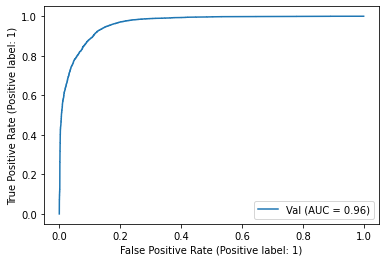

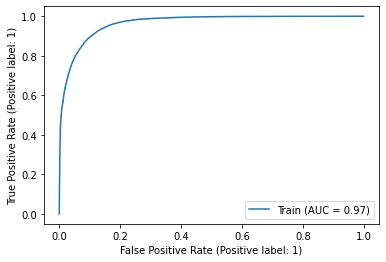

In [ ]:
# final model
# prepare the model
model_ = LogisticRegression()
model_.fit(X_train_, y_train_)
# estimate accuracy on validation dataset
predictions = model_.predict(X_val_)
print("Accuracy in training set  : ", sklearn.metrics.balanced_accuracy_score(y_train_, model_.predict(X_train_)))
print("Accuracy in validation set: ", sklearn.metrics.balanced_accuracy_score(y_val_, predictions))
#print(confusion_matrix(y_val_, predictions))
print(classification_report(y_val_, predictions))
metrics.plot_roc_curve(model_, X_val_, y_val_ , name = 'Val');
metrics.plot_roc_curve(model_, X_train_, y_train_, name = 'Train');

Accuracy in training set  :  1.0
Accuracy in validation set:  0.9262405477678504
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7308
           1       0.92      0.93      0.93      7307

    accuracy                           0.93     14615
   macro avg       0.93      0.93      0.93     14615
weighted avg       0.93      0.93      0.93     14615



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



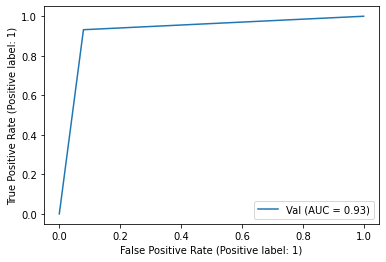

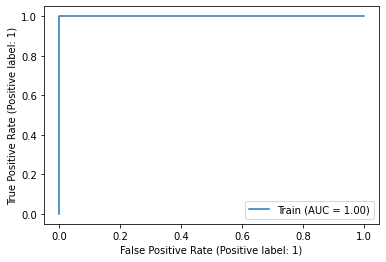

In [ ]:
# final model
# prepare the model
model_1 = DecisionTreeClassifier()
model_1.fit(X_train_, y_train_)
# estimate accuracy on validation dataset
predictions = model_1.predict(X_val_)
print("Accuracy in training set  : ", sklearn.metrics.balanced_accuracy_score(y_train_, model_1.predict(X_train_)))
print("Accuracy in validation set: ", sklearn.metrics.balanced_accuracy_score(y_val_, predictions))
#print(confusion_matrix(y_val_, predictions))
print(classification_report(y_val_, predictions))
metrics.plot_roc_curve(model_1, X_val_, y_val_, name = 'Val');
metrics.plot_roc_curve(model_1, X_train_, y_train_, name = 'Train');

In [ ]:
import optuna
import sklearn

def model_performance(model, X=X_val_, y=y_val_):
    y_pred = model.predict(X)
    return round(sklearn.metrics.balanced_accuracy_score(y_pred, y),4)

def create_model(trial):
    model_type = trial.suggest_categorical('model_type', ['logistic-regression', 'decision-tree'])

    if model_type == 'logistic-regression':
        penalty = trial.suggest_categorical('penalty', ['l2', 'l1'])
        if penalty == 'l1':
            solver = 'saga'
        else:
            solver = 'lbfgs'
        regularization = trial.suggest_uniform('logistic-regularization', 0.01, 10)
        model = LogisticRegression(penalty=penalty, C=regularization, solver=solver)
    
    if model_type == 'decision-tree':
        max_depth = trial.suggest_int('max_depth', 5, X_train.shape[1])
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 20)
        model = DecisionTreeClassifier(
            max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf
          )
        
    if trial.should_prune():
            raise optuna.TrialPruned()
            
    return model


def objective(trial):
    model = create_model(trial)
    model.fit(X_train_, y_train_)
    return model_performance(model)

study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=1000)

In [ ]:
study.best_params

{'max_depth': 28,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'model_type': 'decision-tree'}

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
import optuna
import sklearn

def model_performance(model, X=X_val_, y=y_val_):
    y_pred = model.predict(X)
    return round(sklearn.metrics.balanced_accuracy_score(y_pred, y),4)

def create_model(trial):
    model_type = trial.suggest_categorical('model_type', ['decision-tree'])

    # if model_type == 'logistic-regression':
    #     penalty = trial.suggest_categorical('penalty', ['l2', 'l1'])
    #     if penalty == 'l1':
    #         solver = 'saga'
    #     else:
    #         solver = 'lbfgs'
    #     regularization = trial.suggest_uniform('logistic-regularization', 0.01, 10)
    #     model = LogisticRegression(penalty=penalty, C=regularization, solver=solver)
    
    if model_type == 'decision-tree':
        max_depth = trial.suggest_int('max_depth', 20, X_train.shape[1])
        min_samples_split = trial.suggest_int('min_samples_split', 2, 8)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 6)
        model = DecisionTreeClassifier(
            max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf
          )
        
    if trial.should_prune():
            raise optuna.TrialPruned()
            
    return model


def objective(trial):
    model = create_model(trial)
    model.fit(X_train_, y_train_)
    return model_performance(model)

study1 = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
study1.optimize(objective, n_trials=1000)

[I 2022-02-22 05:34:57,272] A new study created in memory with name: no-name-e9a756f2-e2eb-4226-99dd-d9342c690c51
[I 2022-02-22 05:34:57,939] Trial 0 finished with value: 0.9206 and parameters: {'model_type': 'decision-tree', 'max_depth': 36, 'min_samples_split': 3, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.9206.
[I 2022-02-22 05:34:58,627] Trial 1 finished with value: 0.9267 and parameters: {'model_type': 'decision-tree', 'max_depth': 21, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.9267.
[I 2022-02-22 05:34:59,328] Trial 2 finished with value: 0.923 and parameters: {'model_type': 'decision-tree', 'max_depth': 24, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.9267.
[I 2022-02-22 05:35:00,024] Trial 3 finished with value: 0.9276 and parameters: {'model_type': 'decision-tree', 'max_depth': 25, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 3 with value: 0.9276.
[I 2022-02-22 05:35:00,599] Trial 4

In [ ]:
study1.best_params

{'max_depth': 26,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'model_type': 'decision-tree'}

In [ ]:
# final model
# prepare the model
model_2 = DecisionTreeClassifier(max_depth = 26, min_samples_leaf = 3, min_samples_split = 2)
model_2.fit(X_train_, y_train_)
# estimate accuracy on validation dataset
predictions = model_2.predict(X_val_)
print("Accuracy in training set  : ", sklearn.metrics.balanced_accuracy_score(y_train_, model_2.predict(X_train_)))
print("Accuracy in validation set: ", sklearn.metrics.balanced_accuracy_score(y_val_, predictions))
#print(confusion_matrix(y_val_, predictions))
print(classification_report(y_val_, predictions))

Accuracy in training set  :  0.975470053636527
Accuracy in validation set:  0.9281559756788988
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7308
           1       0.93      0.93      0.93      7307

    accuracy                           0.93     14615
   macro avg       0.93      0.93      0.93     14615
weighted avg       0.93      0.93      0.93     14615



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



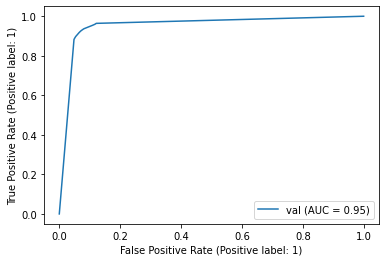

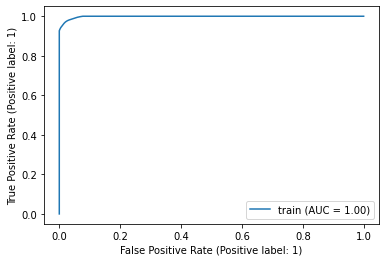

In [ ]:
metrics.plot_roc_curve(model_2, X_val_, y_val_, name = 'val');
metrics.plot_roc_curve(model_2, X_train_, y_train_, name = 'train');

Feature: 0, Score: 0.03462
Feature: 1, Score: 0.43088
Feature: 2, Score: 0.01526
Feature: 3, Score: 0.00119
Feature: 4, Score: 0.19320
Feature: 5, Score: 0.12178
Feature: 6, Score: 0.00690
Feature: 7, Score: 0.03523
Feature: 8, Score: 0.07659
Feature: 9, Score: 0.00212
Feature: 10, Score: 0.00381
Feature: 11, Score: 0.00333
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00403
Feature: 15, Score: 0.00442
Feature: 16, Score: 0.00249
Feature: 17, Score: 0.00229
Feature: 18, Score: 0.00290
Feature: 19, Score: 0.00353
Feature: 20, Score: 0.00429
Feature: 21, Score: 0.00162
Feature: 22, Score: 0.00310
Feature: 23, Score: 0.00673
Feature: 24, Score: 0.00114
Feature: 25, Score: 0.00150
Feature: 26, Score: 0.00191
Feature: 27, Score: 0.02105
Feature: 28, Score: 0.00116
Feature: 29, Score: 0.00199
Feature: 30, Score: 0.00271
Feature: 31, Score: 0.00560
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00037
Feature: 34, Score: 0.00103
Feature: 35, Score: 0.00057
Fe

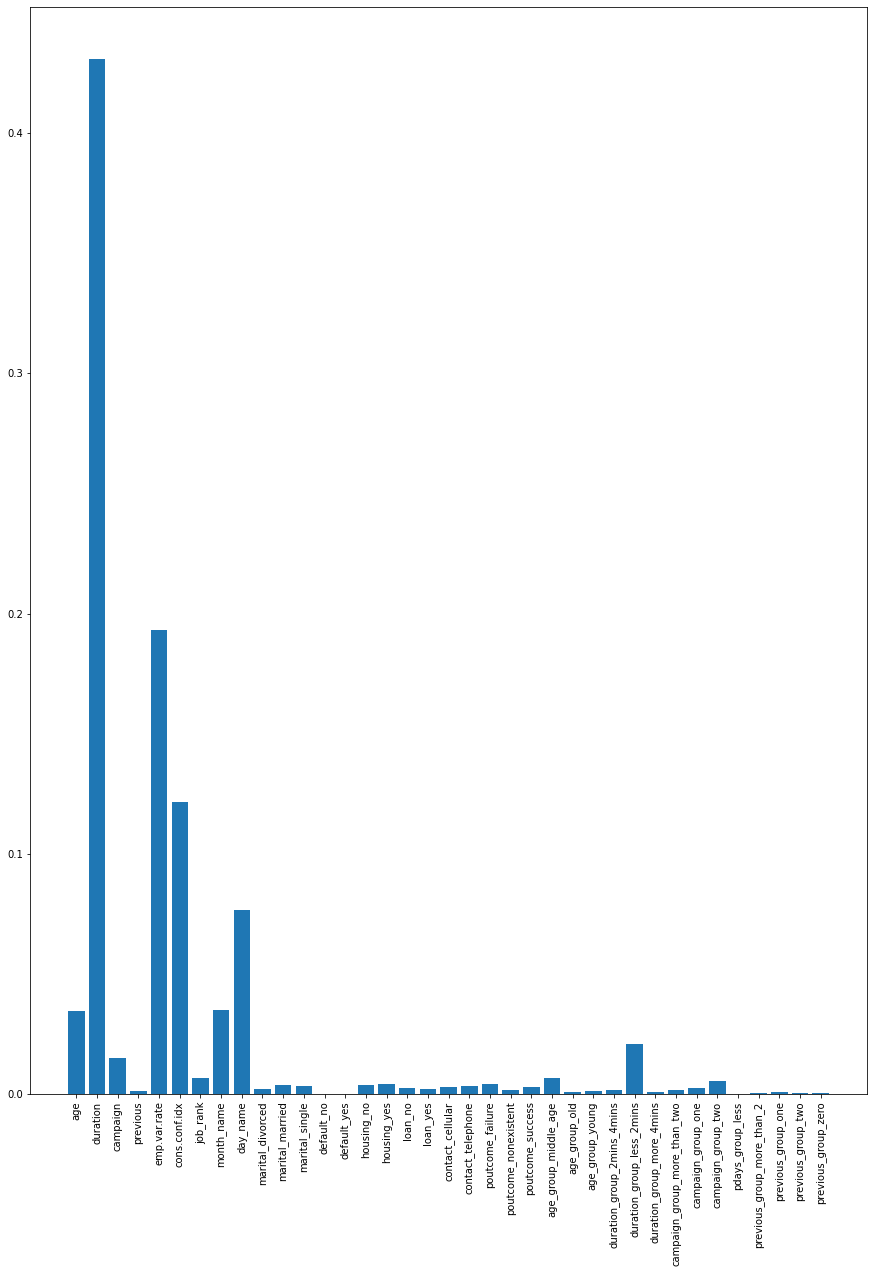

In [ ]:
importance = model_2.feature_importances_
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize = (15,20))
plt.bar([x for x in X_.columns], importance)
plt.xticks(rotation = 90)
plt.show() 

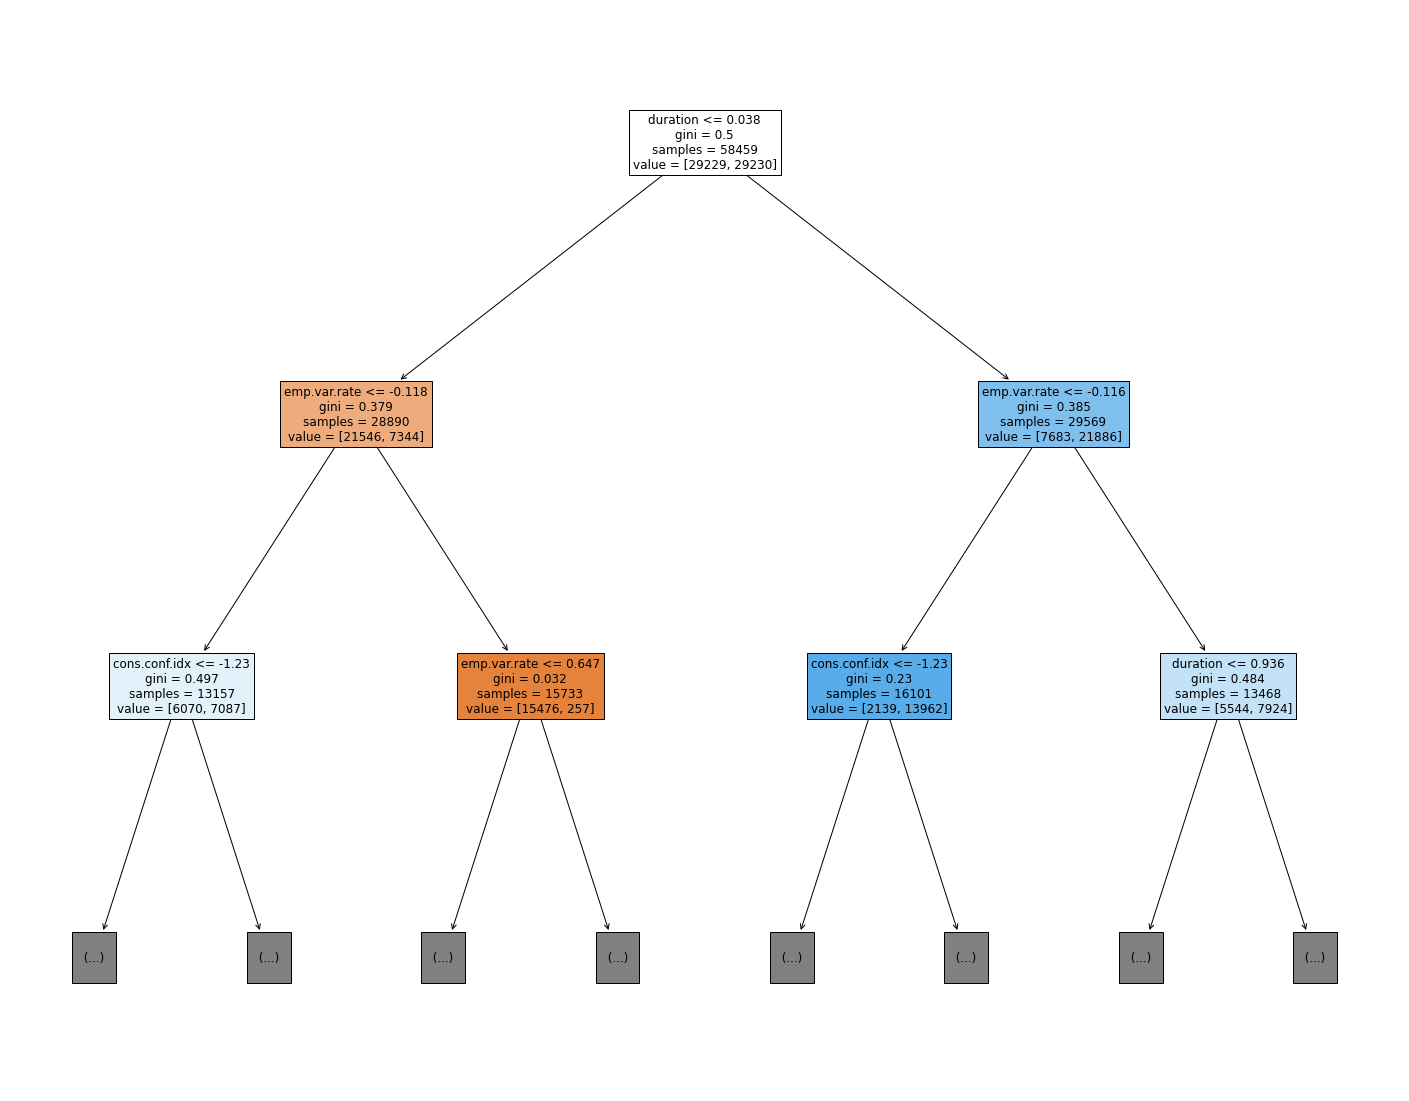

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_2,feature_names = X_.columns ,max_depth = 2, filled=True, fontsize = 12)

In [ ]:
import optuna
import sklearn

def model_performance(model, X=X_val_1, y=y_val_1):
    y_pred = model.predict(X)
    return round(sklearn.metrics.roc_auc_score(y_pred, y),6)

def create_model(trial):
    model_type = trial.suggest_categorical('model_type', ['logistic-regression', 'decision-tree'])

    if model_type == 'logistic-regression':
        penalty = trial.suggest_categorical('penalty', ['l2', 'l1'])
        if penalty == 'l1':
            solver = 'saga'
        else:
            solver = 'lbfgs'
        regularization = trial.suggest_uniform('logistic-regularization', 0.01, 10)
        model = LogisticRegression(penalty=penalty, C=regularization, solver=solver)
    
    if model_type == 'decision-tree':
        max_depth = trial.suggest_int('max_depth', 5, X_train1.shape[1])
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 20)
        model = DecisionTreeClassifier(
            max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf
          )
        
    if trial.should_prune():
            raise optuna.TrialPruned()
            
    return model


def objective(trial):
    model = create_model(trial)
    model.fit(X_train_1, y_train_1)
    return model_performance(model)

study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=1000)

[I 2022-02-23 05:42:29,045] A new study created in memory with name: no-name-03d3df4d-cdeb-4c7e-8d9d-36ba72c6128f
[I 2022-02-23 05:42:29,170] Trial 0 finished with value: 0.889341 and parameters: {'model_type': 'decision-tree', 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 11}. Best is trial 0 with value: 0.889341.
[I 2022-02-23 05:42:29,280] Trial 1 finished with value: 0.889341 and parameters: {'model_type': 'decision-tree', 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 14}. Best is trial 0 with value: 0.889341.
[I 2022-02-23 05:42:29,393] Trial 2 finished with value: 0.889341 and parameters: {'model_type': 'decision-tree', 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.889341.
[I 2022-02-23 05:42:29,568] Trial 3 finished with value: 0.832749 and parameters: {'model_type': 'logistic-regression', 'penalty': 'l2', 'logistic-regularization': 2.4619028735670874}. Best is trial 0 with value: 0.889341.
[I 2022-02-2

In [ ]:
study.best_params

{'max_depth': 5,
 'min_samples_leaf': 11,
 'min_samples_split': 10,
 'model_type': 'decision-tree'}

In [ ]:
# final model
# prepare the model
model_3 = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 11, min_samples_split = 10)
model_3.fit(X_train_1, y_train_1)
# estimate accuracy on validation dataset
predictions = model_3.predict(X_val_1)
print("Accuracy in training set  : ", sklearn.metrics.balanced_accuracy_score(y_train_1, model_3.predict(X_train_1)))
print("Accuracy in validation set: ", sklearn.metrics.balanced_accuracy_score(y_val_1, predictions))
#print(confusion_matrix(y_val_, predictions))
print(classification_report(y_val_1, predictions))

Accuracy in training set  :  0.8781526144481308
Accuracy in validation set:  0.8799232150919007
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      7308
           1       0.83      0.96      0.89      7307

    accuracy                           0.88     14615
   macro avg       0.89      0.88      0.88     14615
weighted avg       0.89      0.88      0.88     14615



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


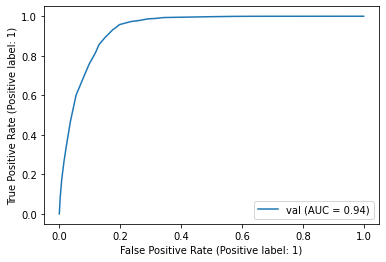

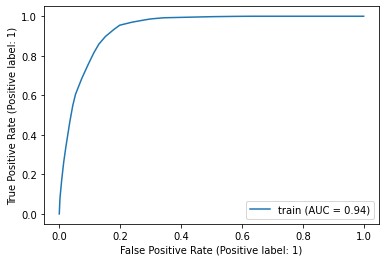

In [ ]:
metrics.plot_roc_curve(model_3, X_val_1, y_val_1, name = 'val');
metrics.plot_roc_curve(model_3, X_train_1, y_train_1, name = 'train');

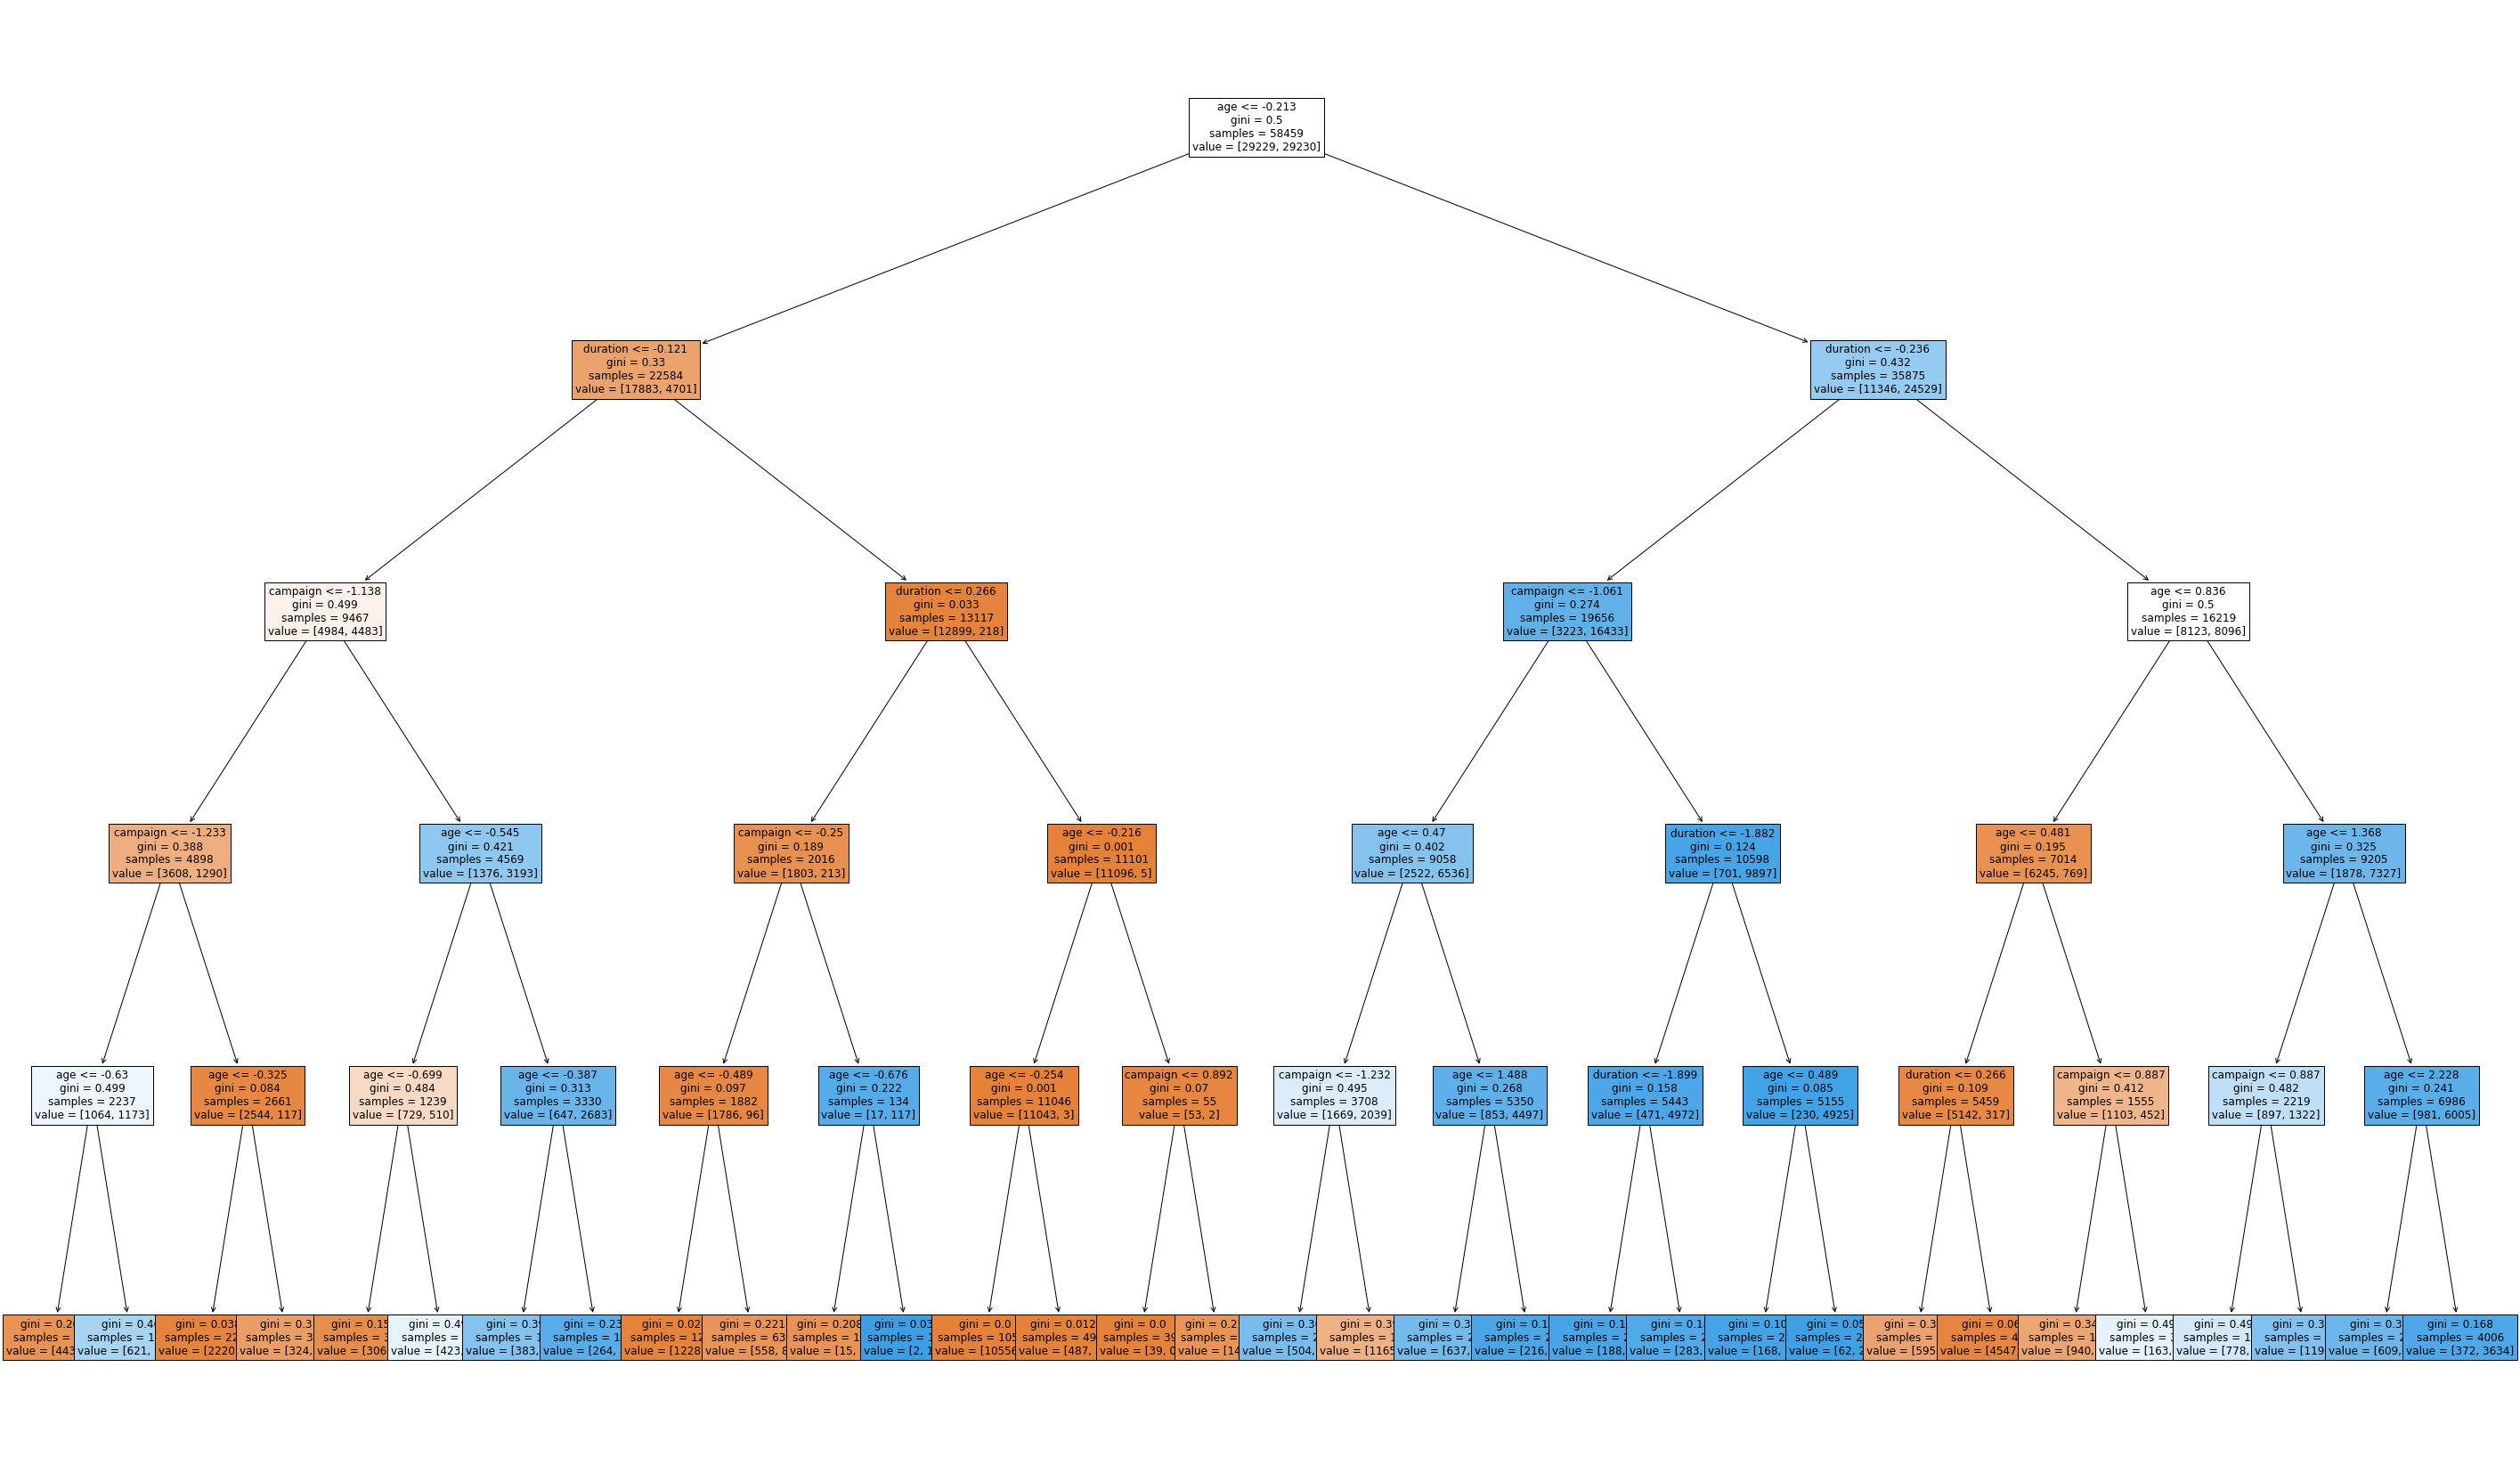

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(50,30))
_ = tree.plot_tree(model_3,feature_names = X_.columns ,max_depth = 5, filled=True, fontsize = 12)